In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC                                 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from tensorflow import keras
import pickle
%matplotlib inline

## Reading data from file

In [2]:
df = pd.read_csv('Heart stroke.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.drop(columns=['id'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
#from above we can see that hypertension, heart disease, stroke have only classfication value so we only consider age ,bmi , glucose level as numerical data
num_df = ['age','avg_glucose_level','bmi']

# Filling missing value

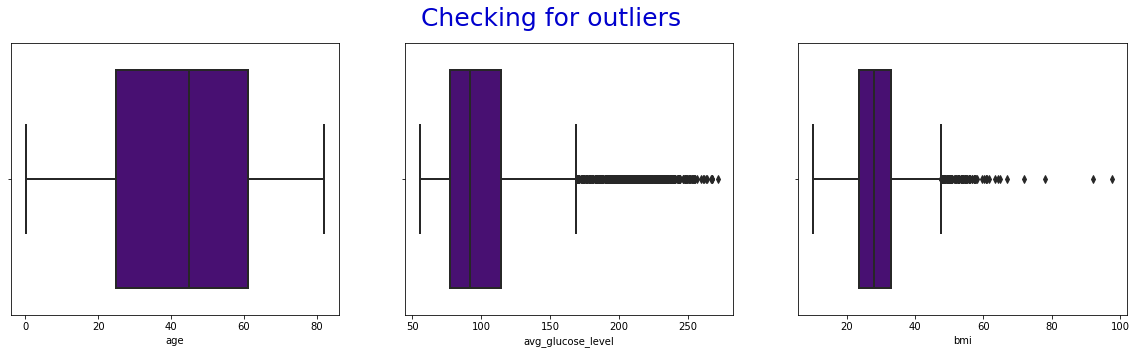

In [8]:
#checking for outliers with boxplot
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('Checking for outliers', fontsize = 25, color = 'mediumblue')
i=0
for x in num_df:
    sns.boxplot(x = df[x], ax= ax[i], color= 'indigo', linewidth= 2)
    i = i+1
plt.show()

## from here we can see that glucose and bmi have lots of outliers

# dealing with avg_glucose_level and bmi column. I will apply median imputation to these columns

In [10]:
col_out = ['avg_glucose_level','bmi']
for col in col_out:
    for i in df[col]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        lqr = q3-q1
        lower_tail = q1 - 1.5*lqr
        uper_tail = q3 + 1.5*lqr
        if i > uper_tail or i<lower_tail:
            df[col] = df[col].replace(i,np.median(df[col]))

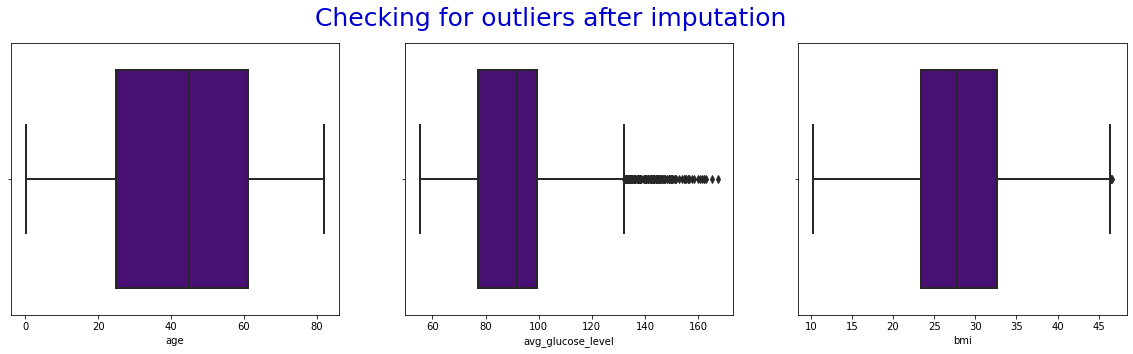

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('Checking for outliers after imputation', fontsize = 25, color = 'mediumblue')
i=0
for x in num_df:
    sns.boxplot(x = df[x], ax= ax[i], color= 'indigo', linewidth= 2)
    i = i+1
plt.show()

In [12]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4789.000000,5110.000000
mean,43.226614,0.097456,0.054012,90.000564,28.274107,0.048728
std,22.612647,0.296607,0.226063,18.777279,6.793541,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.400000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,27.800000,0.000000
75%,61.000000,0.000000,0.000000,99.157500,32.600000,0.000000
max,82.000000,1.000000,1.000000,167.410000,46.600000,1.000000


In [13]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  321
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

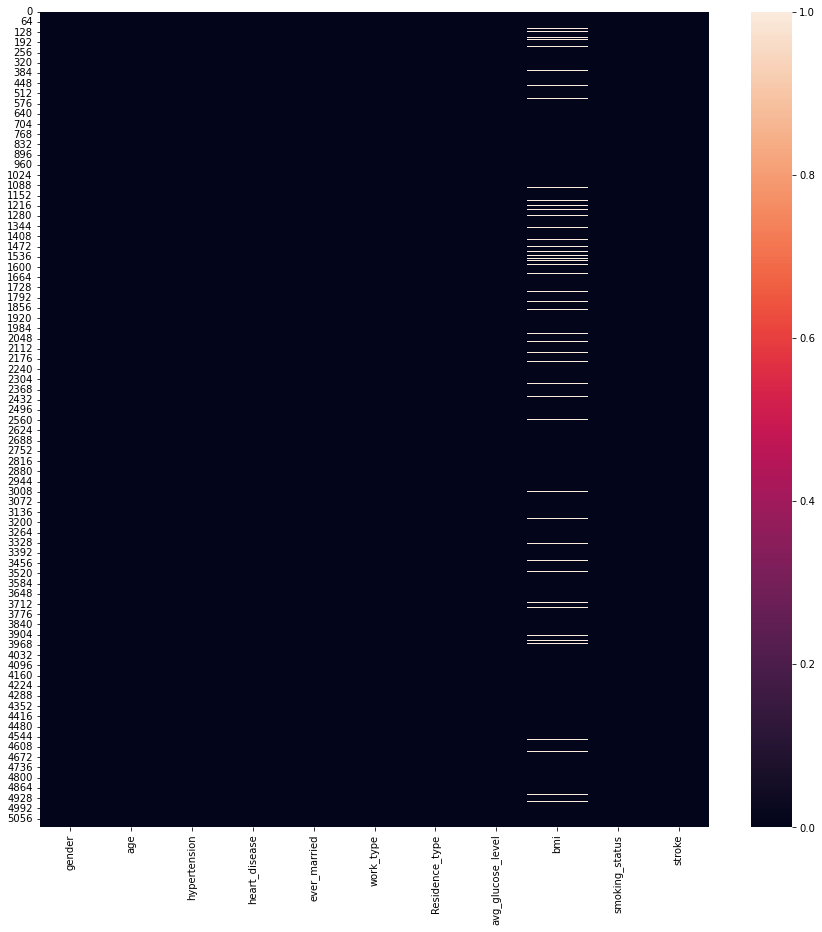

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())

### white line against bmi indicates NAN values

In [15]:
df[df.bmi.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,91.882500,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.150000,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,91.880156,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,91.880010,NaN,Unknown,1
21,Female,52.0,1,0,Yes,Self-employed,Urban,91.880002,NaN,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.920000,NaN,never smoked,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.020000,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.940000,NaN,smokes,0
5103,Female,18.0,0,0,No,Private,Urban,82.850000,NaN,Unknown,0


In [16]:
df['bmi'].fillna(df["bmi"].mean(), inplace=True)

<AxesSubplot:>

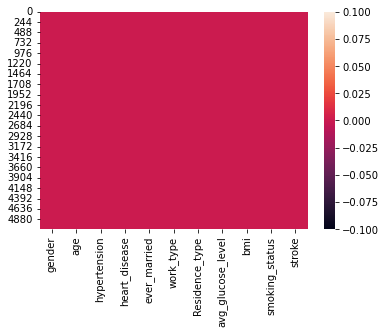

In [17]:
sns.heatmap(df.isnull())

# EDA

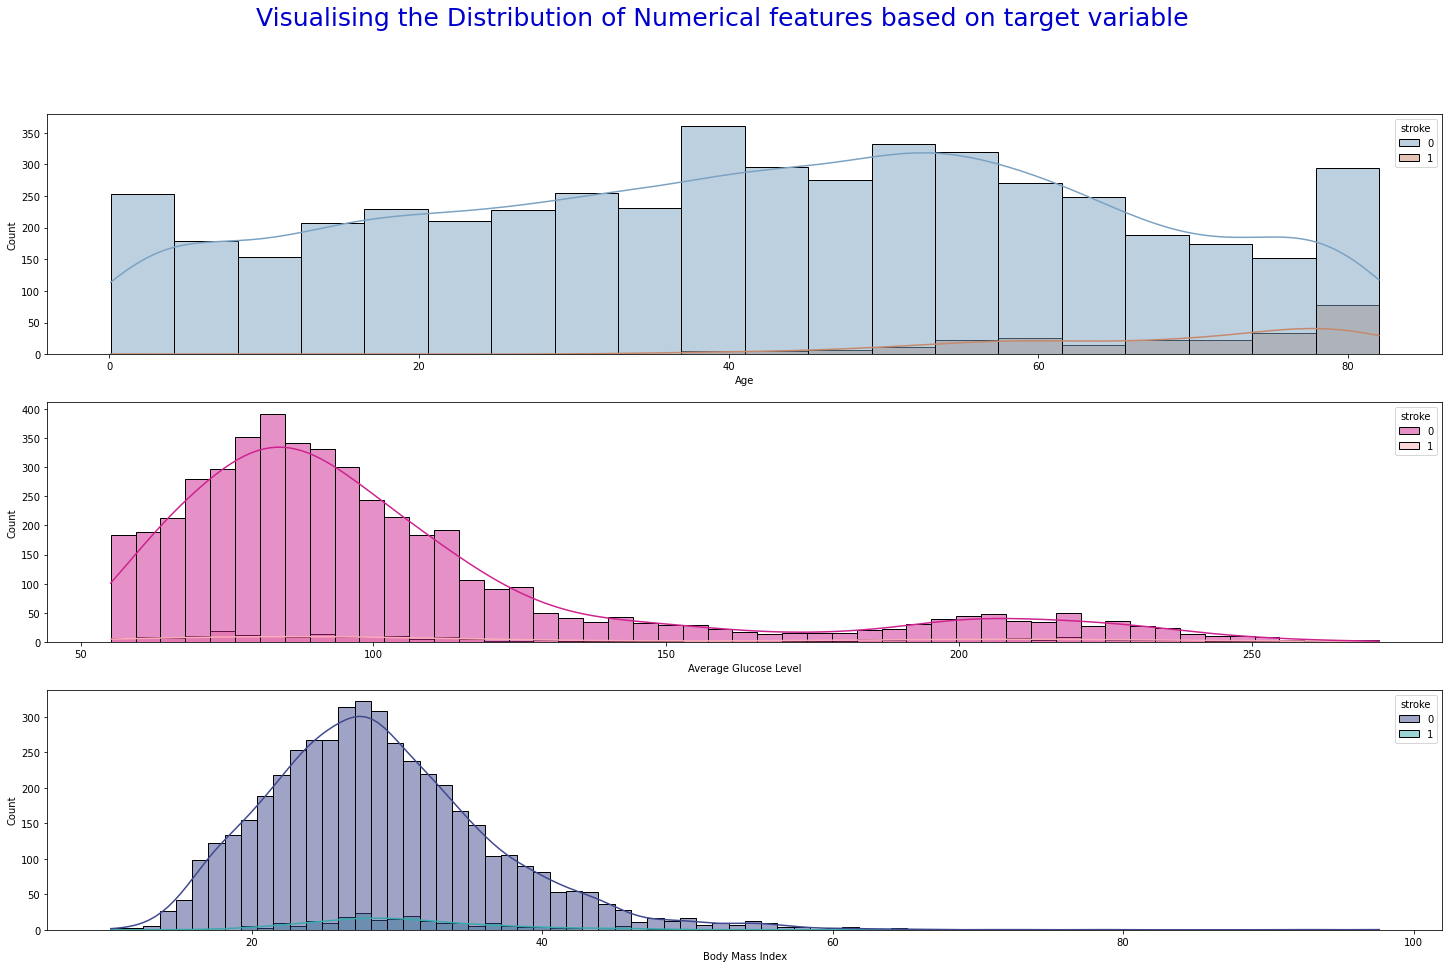

In [9]:
fig, ax = plt.subplots(3, 1, figsize = (25, 15))
plt.suptitle('Visualising the Distribution of Numerical features based on target variable', fontsize = 25, color = 'mediumblue')
sns.histplot(x = df['age'], hue= df['stroke'], kde= True, ax= ax[0], palette = 'twilight_shifted')
ax[0].set(xlabel = 'Age')
sns.histplot(x = df['avg_glucose_level'], hue= df['stroke'], kde= True, ax= ax[1], palette = 'RdPu_r')
ax[1].set(xlabel = 'Average Glucose Level')
sns.histplot(x = df['bmi'], hue= df['stroke'], kde= True, ax= ax[2], palette = 'mako')
ax[2].set(xlabel = 'Body Mass Index')
plt.show()

# from this we can conclude that as ages increases chances of heart stroke also increases

In [18]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

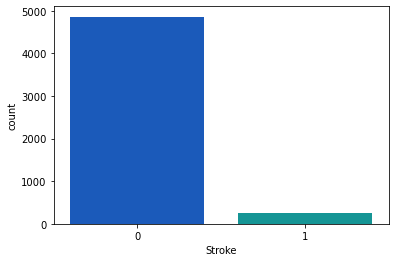

In [19]:
sns.countplot(x = df['stroke'], palette= 'winter')
plt.xlabel('Stroke');

### very less value of stroke patient which need  to be handle during spliting of dataset

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

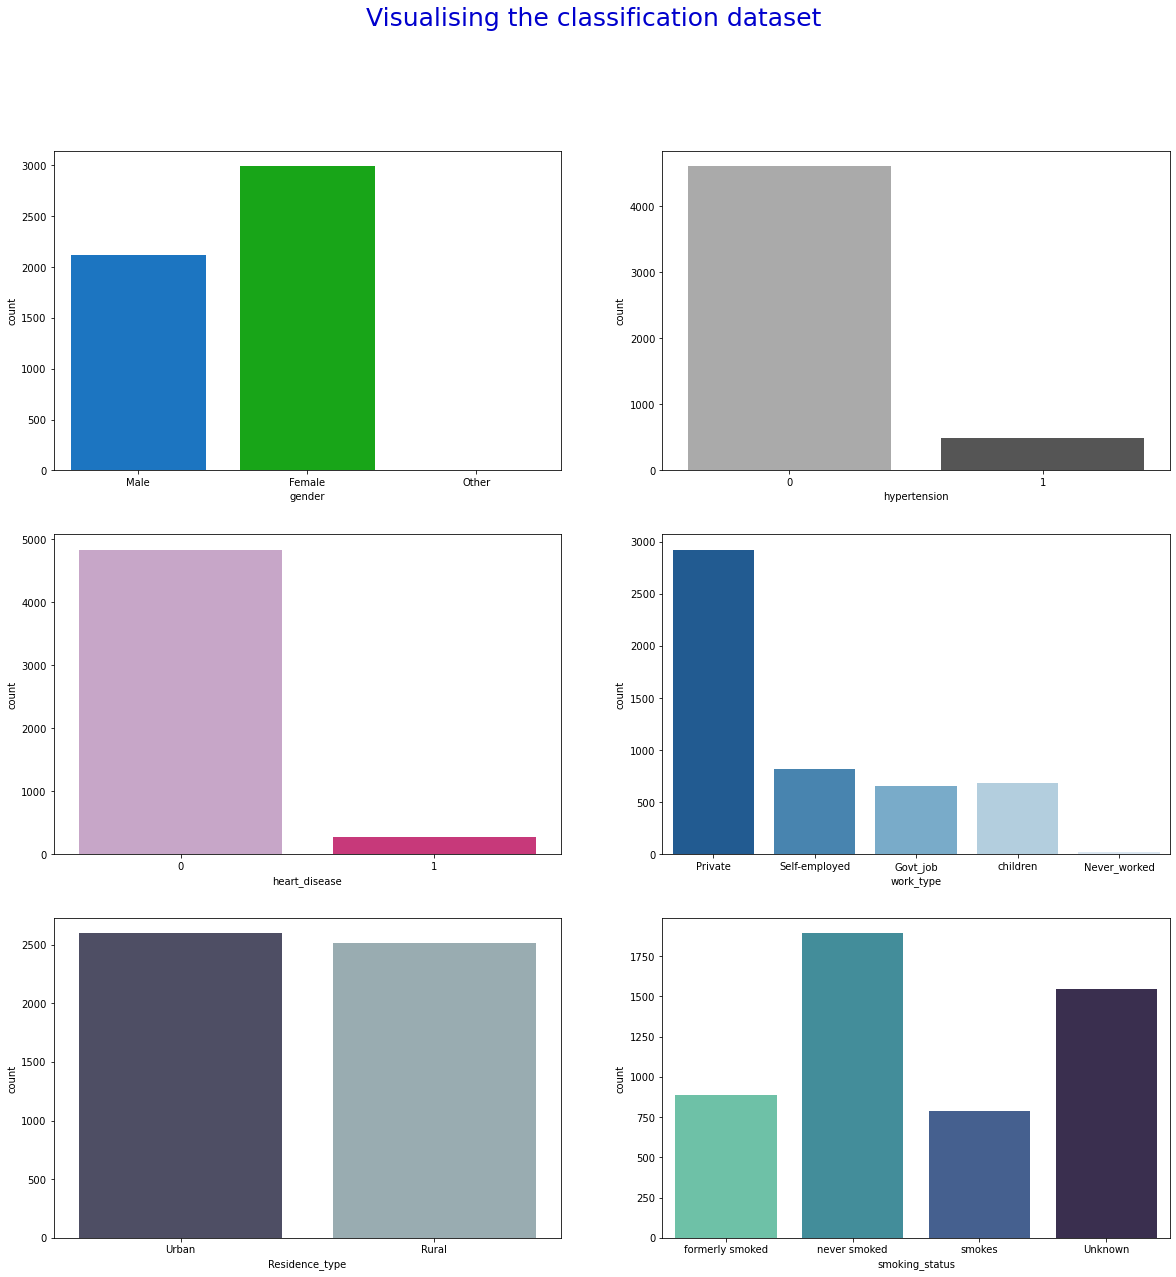

In [20]:
fig, ax = plt.subplots(3, 2, figsize = (20, 20))
plt.suptitle('Visualising the classification dataset',color='mediumblue',fontsize=25)
sns.countplot(x=df['gender'],ax=ax[0,0],palette='nipy_spectral')
sns.countplot(x=df['hypertension'],ax=ax[0,1],palette='gist_yarg')
sns.countplot(x=df['heart_disease'],ax=ax[1,0],palette='PuRd')
sns.countplot(x=df['work_type'],ax=ax[1,1],palette='Blues_r')
sns.countplot(x=df['Residence_type'],ax=ax[2,0],palette='bone')
sns.countplot(x=df['smoking_status'],ax=ax[2,1],palette='mako_r')

In [21]:
df.gender[df['gender']=='Other'].count()

1

In [22]:
df[df['gender']=='Other'].index[0]

3116

#### here we can see that only one value with other gender. we simply drop this value to improve our model accuracy

In [23]:
df.drop(df[df['gender']=='Other'].index,axis = 0,inplace=True)

In [24]:
df.gender[df['gender']=='Other'].count()

0

In [25]:
df.shape

(5109, 11)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

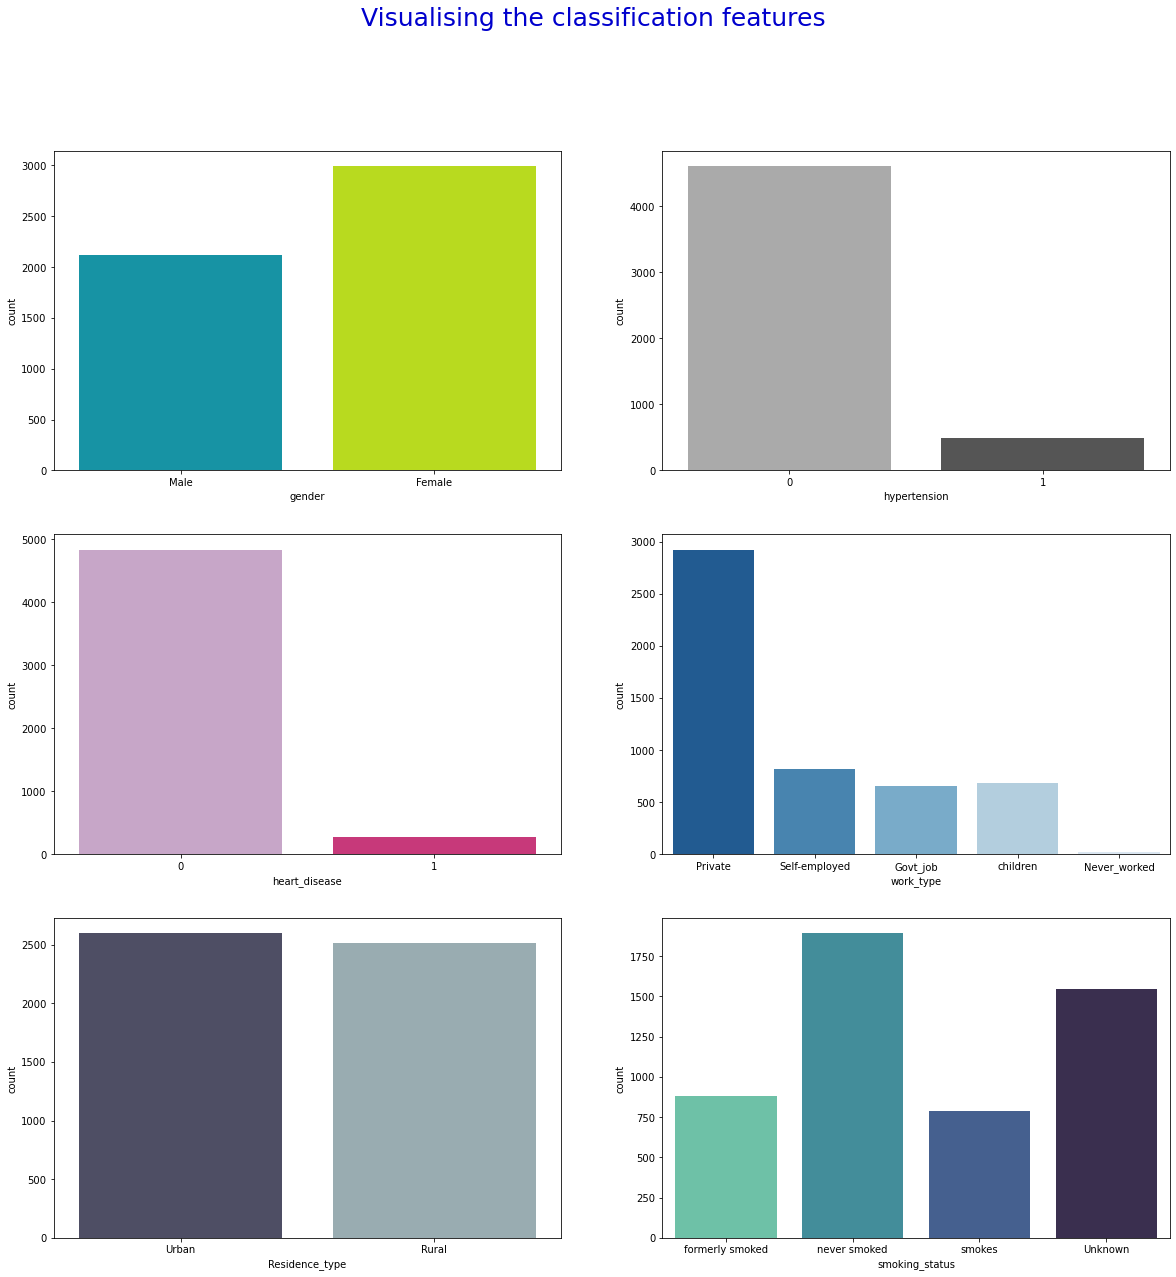

In [26]:
fig, ax = plt.subplots(3, 2, figsize = (20, 20))
plt.suptitle('Visualising the classification features',color='mediumblue',fontsize=25)
sns.countplot(x=df['gender'],ax=ax[0,0],palette='nipy_spectral')
sns.countplot(x=df['hypertension'],ax=ax[0,1],palette='gist_yarg')
sns.countplot(x=df['heart_disease'],ax=ax[1,0],palette='PuRd')
sns.countplot(x=df['work_type'],ax=ax[1,1],palette='Blues_r')
sns.countplot(x=df['Residence_type'],ax=ax[2,0],palette='bone')
sns.countplot(x=df['smoking_status'],ax=ax[2,1],palette='mako_r')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

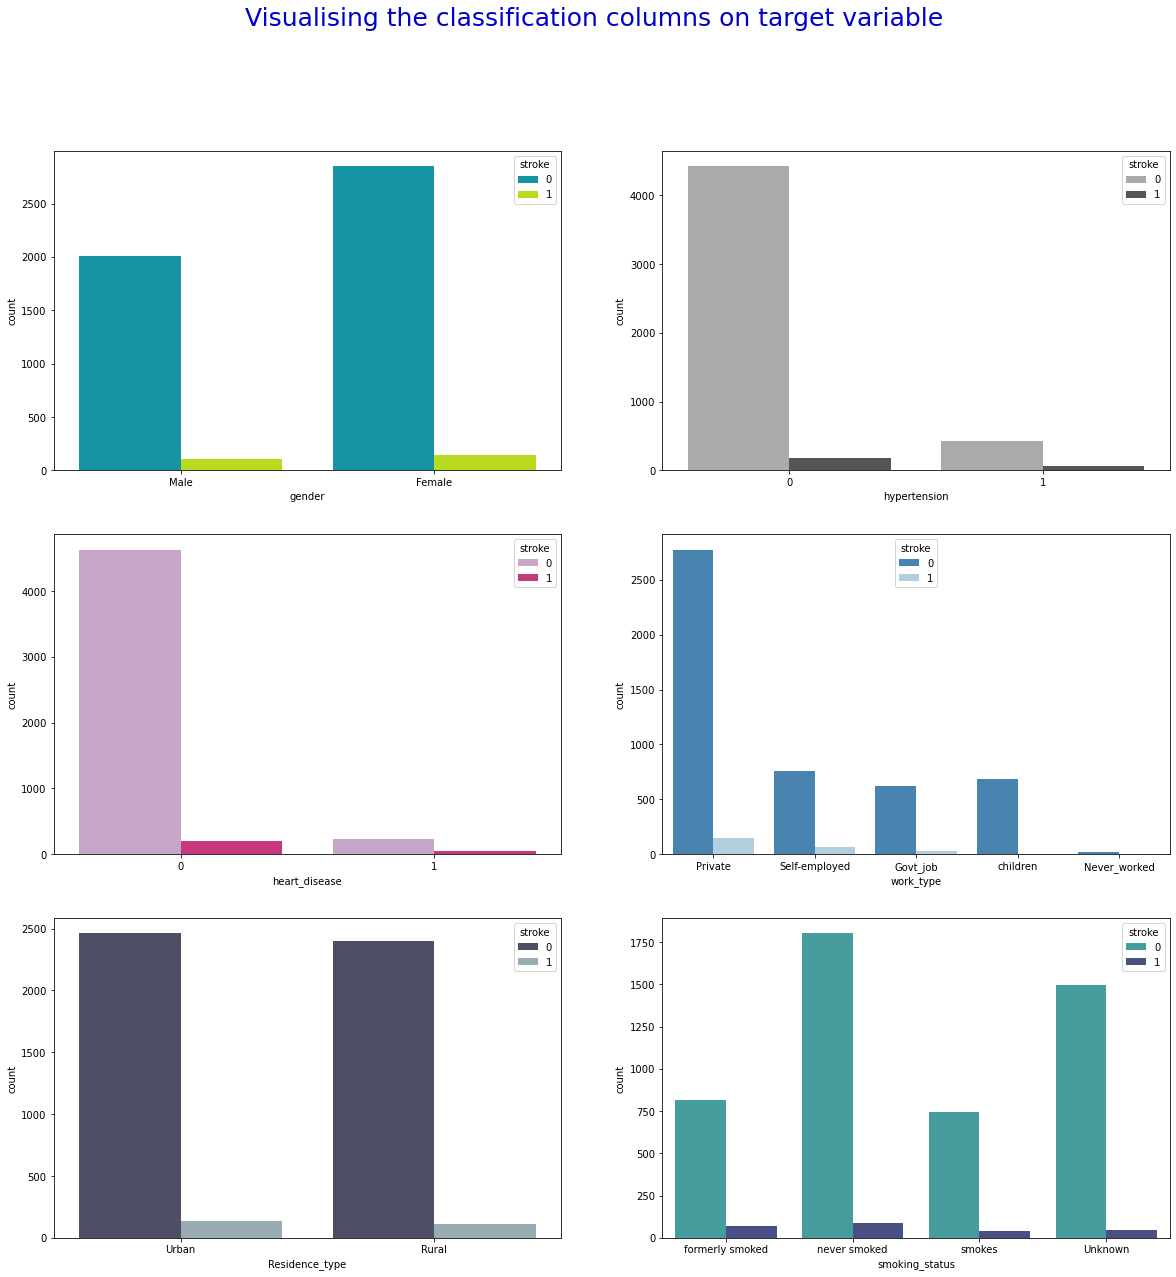

In [27]:
fig, ax = plt.subplots(3, 2, figsize = (20, 20))
plt.suptitle('Visualising the classification columns on target variable',color='mediumblue',fontsize=25)
sns.countplot(x=df['gender'],ax=ax[0,0],palette='nipy_spectral',hue=df['stroke'])
sns.countplot(x=df['hypertension'],ax=ax[0,1],palette='gist_yarg',hue=df['stroke'])
sns.countplot(x=df['heart_disease'],ax=ax[1,0],palette='PuRd',hue=df['stroke'])
sns.countplot(x=df['work_type'],ax=ax[1,1],palette='Blues_r',hue=df['stroke'])
sns.countplot(x=df['Residence_type'],ax=ax[2,0],palette='bone',hue=df['stroke'])
sns.countplot(x=df['smoking_status'],ax=ax[2,1],palette='mako_r',hue=df['stroke'])

In [28]:
#getting unique value for classifiaction features

for col in df:
    if col not in num_df:
        print(f'{col} : {df[col].unique()}')

gender : ['Male' 'Female']
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke : [1 0]


## Creating a correlation matrix to understand the faeature between various column

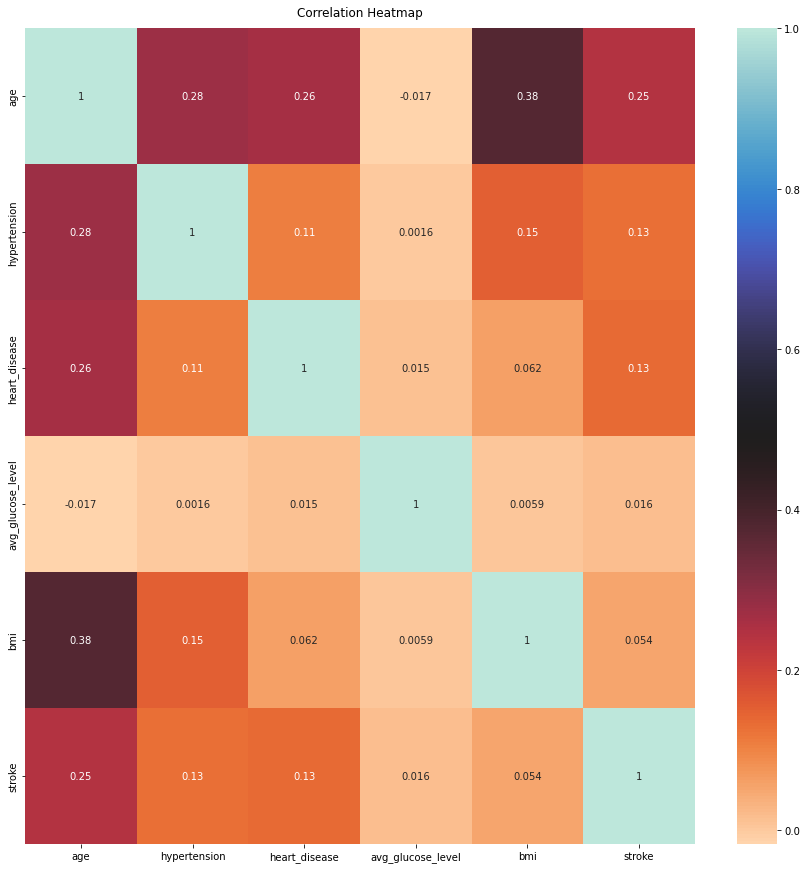

In [29]:
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df.corr(),annot=True,cmap="icefire_r");
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Encoding 

In [30]:
#replacing male = 1, Yes =1, Urban = 1

df['gender'].replace({'Male':1,'Female':0},inplace=True)
df.replace({'Yes':1,'No':0},inplace=True)
df['Residence_type'].replace({'Urban':1,'Rural':0},inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 479.0+ KB


In [32]:
#Doing one hot encoding for work_type,smoking_Status
df_encoded = pd.get_dummies(df,drop_first=True)

In [33]:
df_encoded

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,91.885000,36.600000,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,91.882500,28.274107,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.920000,32.500000,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,91.881250,34.400000,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,91.880625,24.000000,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.750000,28.274107,0,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.200000,40.000000,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.990000,30.600000,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,91.880000,25.600000,0,0,1,0,0,1,0,0


## Scaling

In [34]:
scaler = StandardScaler()
df_encoded[num_df]=scaler.fit_transform(df_encoded[num_df])

In [35]:
df_encoded.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5109.000000,5.109000e+03,5109.000000,5109.000000,5109.000000,5109.000000,5.109000e+03,5.109000e+03,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,3.077275e-16,0.097475,0.054022,0.656293,0.508123,-5.001219e-16,1.075237e-16,0.048738,0.004306,0.572323,0.160305,0.134469,0.173028,0.370327,0.154433
std,0.492592,1.000098e+00,0.296633,0.226084,0.474991,0.499983,1.000098e+00,1.000098e+00,0.215340,0.065486,0.494790,0.366925,0.341188,0.378308,0.482939,0.361399
min,0.000000,-1.908332e+00,0.000000,0.000000,0.000000,0.000000,-1.858506e+00,-2.733403e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.062312e-01,0.000000,0.000000,0.000000,0.000000,-6.795556e-01,-6.805289e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.827984e-02,0.000000,0.000000,1.000000,1.000000,1.007264e-01,-1.748375e-04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,7.858887e-01,0.000000,0.000000,1.000000,1.000000,4.882025e-01,5.968151e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.714625e+00,1.000000,1.000000,1.000000,1.000000,4.126321e+00,2.786548e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## data splitting

In [36]:
#Doing over sampling for minority classes 
sampling_strategy = 0.6
oversample = RandomOverSampler(sampling_strategy=sampling_strategy)
X=df_encoded.drop(['stroke'],axis=1)
y=df_encoded['stroke']
X_over, y_over = oversample.fit_resample(X, y)

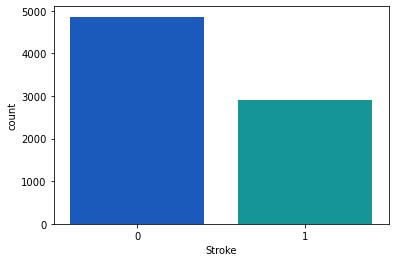

In [37]:
sns.countplot(x = y_over, palette= 'winter')
plt.xlabel('Stroke');

### Splitting into train and test set

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=65,test_size=0.2)

In [39]:
print('Train data set size is', X_train.shape, 'and test size is ', X_test.shape)

Train data set size is (6220, 15) and test size is  (1556, 15)


# ANN

In [40]:
model = keras.Sequential([
    keras.layers.Dense(30,input_shape = (15,),activation = 'relu'),
    keras.layers.Dense(25,activation = 'relu'),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [41]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
195/195 [==============================] - 1s 884us/step - loss: 0.5338 - accuracy: 0.7386
Epoch 2/250
195/195 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7805
Epoch 3/250
195/195 [==============================] - 0s 944us/step - loss: 0.4253 - accuracy: 0.7912
Epoch 4/250
195/195 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.7958
Epoch 5/250
195/195 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8092
Epoch 6/250
195/195 [==============================] - 0s 968us/step - loss: 0.3717 - accuracy: 0.8207
Epoch 7/250
195/195 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8257
Epoch 8/250
195/195 [==============================] - 0s 862us/step - loss: 0.3391 - accuracy: 0.8383
Epoch 9/250
195/195 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8502
Epoch 10/250
195/195 [==============================] - 0s 859us/step - loss: 0.315

In [42]:
model.evaluate(X_test,y_test)

49/49 [==============================] - 0s 879us/step - loss: 0.1563 - accuracy: 0.9640


[0.15632732212543488, 0.9640102982521057]

In [43]:
model.evaluate(X_train,y_train)

195/195 [==============================] - 0s 715us/step - loss: 0.0129 - accuracy: 0.9968


[0.012905284762382507, 0.9967845678329468]

In [44]:
y_train

849     0
2575    0
187     1
588     0
1130    0
       ..
3399    0
2773    0
296     0
575     0
2165    0
Name: stroke, Length: 6220, dtype: int64

In [45]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

195/195 [==============================] - 0s 637us/step


In [46]:
X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
849,0,1.183919,1,0,1,1,0.512187,0.916151,0,0,1,0,1,0,0
2575,1,-0.717780,0,0,0,1,-0.926325,1.554823,0,1,0,0,0,1,0
187,0,1.714625,1,1,1,1,0.100726,-0.057063,0,0,0,0,1,0,0
588,0,-0.850457,0,0,1,1,-0.000007,-0.589290,0,1,0,0,1,0,0
1130,1,1.626174,0,0,1,1,-0.597477,-0.650116,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,0,1.714625,1,1,1,1,-0.895412,0.794499,0,1,0,0,0,1,0
2773,1,-0.762006,0,0,1,1,0.226510,0.140621,0,0,0,0,1,0,0
296,0,1.007016,0,0,1,0,2.731513,0.034175,0,1,0,0,0,1,0
575,1,0.078280,0,0,1,0,0.531907,1.113835,0,1,0,0,0,1,0


In [47]:
y_test_predict.shape

(1556, 1)

In [48]:
y_test_pred = []
for ele in  y_test_predict:
    if ele >0.5:
        y_test_pred.append(1)
    else:
        y_test_pred.append(0)

In [49]:
y_train_pred = []
for ele in  y_train_predict:
    if ele >0.5:
        y_train_pred.append(1)
    else:
        y_train_pred.append(0)

## Checking the accuracy of the model

In [50]:
print('Accuracy for test data:', accuracy_score(y_test, y_test_pred))
print('Accuracy for train data:', accuracy_score(y_train, y_train_pred))

Accuracy for test data: 0.9640102827763496
Accuracy for train data: 0.9967845659163987


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       956
           1       0.92      1.00      0.96       600

    accuracy                           0.96      1556
   macro avg       0.96      0.97      0.96      1556
weighted avg       0.97      0.96      0.96      1556



Text(69.0, 0.5, 'Truth')

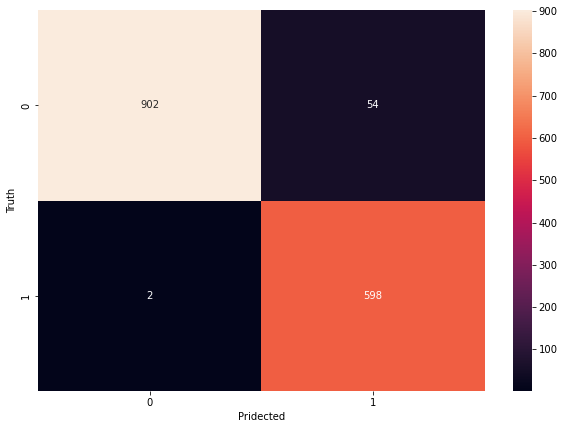

In [51]:
print(classification_report(y_test,y_test_pred))
cm= tf.math.confusion_matrix(labels = y_test,predictions=y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Pridected')
plt.ylabel('Truth')

# From here we conclude that the given model has recall for 1 has 100%. which means whenever any patient has chances of stroke our model will report it accurately. 

In [52]:
input_data = (1,49,0,0,0,0,104.86,31.9,0,1,0,0,0,0,1)

# changing the input_data to numpy array
input_data = np.asarray(input_data)


# reshape the array as we are predicting for one instance
input_data = input_data.reshape(1,-1)

#standarised the data
print(input_data[0,1],input_data[0,10],input_data[0,11])
lst=scaler.transform([[input_data[0,1],input_data[0,6],input_data[0,7]]])
lst
input_data[0,1],input_data[0,6],input_data[0,7] = lst[0,0],lst[0,1],lst[0,2]

print(input_data)

prediction = model.predict(input_data)
print(prediction)
if prediction[0] >= 0.5:
    print('The patient has Stroke')
else:
    print('The patient has not strokee')
#     1	1.051242	0	1	1	1	0.100993	1.265900	0	1	0	0	1	0	0

49.0 0.0 0.0
[[1.         0.25518205 0.         0.         0.         0.
  0.79253384 0.55119568 0.         1.         0.         0.
  0.         0.         1.        ]]
1/1 [==============================] - 0s 47ms/step
[[0.9999907]]
The patient has Stroke


C:\Users\01abn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Saving the model

In [53]:
#Saving the scaler and model
filename = 'heart_stroke.sav'
pickle.dump(model, open(filename, 'wb'))
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-24 02:53:32         2672
metadata.json                                  2022-12-24 02:53:32           64
variables.h5              

In [54]:
# loading the saved model
load_model = pickle.load(open('heart_stroke.sav', 'rb'))
load_scaler = pickle.load(open('scaler.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-24 02:53:32         2672
metadata.json                                  2022-12-24 02:53:32           64
variables.h5                                   2022-12-24 02:53:32        56424
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
........

In [55]:
input_data = (1,49,0,0,0,0,104.86,31.9,0,1,0,0,0,0,1)

# changing the input_data to numpy array
input_data = np.asarray(input_data)


# reshape the array as we are predicting for one instance
input_data = input_data.reshape(1,-1)

#standarised the data
print(input_data[0,1],input_data[0,10],input_data[0,11])
lst=load_scaler.transform([[input_data[0,1],input_data[0,6],input_data[0,7]]])
# lst
input_data[0,1],input_data[0,6],input_data[0,7] = lst[0,0],lst[0,1],lst[0,2]

# print(input_data)

prediction = load_model.predict(input_data)
print(prediction)
if prediction[0] >= 0.5:
    print('The patient has Stroke')
else:
    print('The patient has not strokee')

49.0 0.0 0.0
1/1 [==============================] - 0s 55ms/step
[[0.9999907]]
The patient has Stroke


C:\Users\01abn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
for col in X:
    print(col)

gender
age
hypertension
heart_disease
ever_married
Residence_type
avg_glucose_level
bmi
work_type_Never_worked
work_type_Private
work_type_Self-employed
work_type_children
smoking_status_formerly smoked
smoking_status_never smoked
smoking_status_smokes
